# Section 31 Part 3:  Principle Component Analysis (Iris, World Happiness Index):

##### Lecture 189 The Main Ideas
##### Lecture 190 The Main Idea 2
##### Lecture 191 Data Preprossing
##### Lecture 192 Training the PCA Model
##### Lecture 193 Get Principle Components Out
##### Lecture 194 Classification with Logistic Regression
##### Lecture 195 \z* Maths Behind (Optional)
##### Lecture 196 Case: World Happiness Index


In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Example 1: Iris Dataset

In [175]:
iris = sns.load_dataset('iris')

#### Step 1: Scale the Data

In [176]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [177]:
scaler = StandardScaler()
scaler.fit(iris.iloc[:, 0:4])
X = scaler.transform(iris.iloc[:, 0:4])
X.shape

(150, 4)

In [178]:
X[:, 0].mean()

-4.736951571734001e-16

In [179]:
y = iris.species

#### Step 2: PCA
##### Fit()
##### Loaing Vectors
##### Explained Variances
##### Variance Ratios

In [180]:
pca_iris = PCA()
pca_iris.fit(X)

PCA()

In [181]:
pca_iris.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [182]:
pca_iris.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [183]:
pca_iris.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [184]:
pca_iris.explained_variance_ratio_.cumsum()
# Gives the rations as a cumulative percentage.  Allows to decide how many dimensions to keep.  Dependent on how accurate need to be.

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

#### Step 3: Draw a scree plot of vaiance

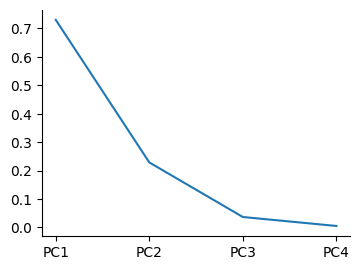

In [185]:
sns.relplot(x=['PC1', 'PC2', 'PC3', 'PC4'],y=pca_iris.explained_variance_ratio_, palette='tab10', kind='line', height=3, aspect=1.3 ).figure.savefig(r'output/IrisRelplot_1.png')

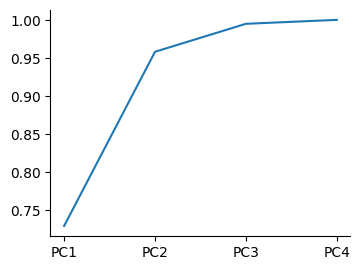

In [186]:
sns.relplot(x=['PC1', 'PC2', 'PC3', 'PC4'],y=pca_iris.explained_variance_ratio_.cumsum(), palette='tab10', kind='line', height=3, aspect=1.3 ).figure.savefig(r'output/IrisRelplot_2CumSum.png')

#### Lecture 193 Get principle components out

##### Step 4: Plot data with principle compoents

In [187]:
X_pca = pd.DataFrame(pca_iris.transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'])
X_pca


,PC1,PC2,PC3,PC4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923
...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257
146,1.564580,-0.896687,-0.026371,-0.220192
147,1.521170,0.269069,0.180178,-0.119171
148,1.372788,1.011254,0.933395,-0.026129


In [188]:
iris_transform = X_pca.copy()
iris_transform['Species'] = y
iris_transform

,PC1,PC2,PC3,PC4,Species
0,-2.264703,0.480027,-0.127706,-0.024168,setosa
1,-2.080961,-0.674134,-0.234609,-0.103007,setosa
2,-2.364229,-0.341908,0.044201,-0.028377,setosa
3,-2.299384,-0.597395,0.091290,0.065956,setosa
4,-2.389842,0.646835,0.015738,0.035923,setosa
...,...,...,...,...,...
145,1.870503,0.386966,0.256274,-0.389257,virginica
146,1.564580,-0.896687,-0.026371,-0.220192,virginica
147,1.521170,0.269069,0.180178,-0.119171,virginica
148,1.372788,1.011254,0.933395,-0.026129,virginica


KeyboardInterrupt: 

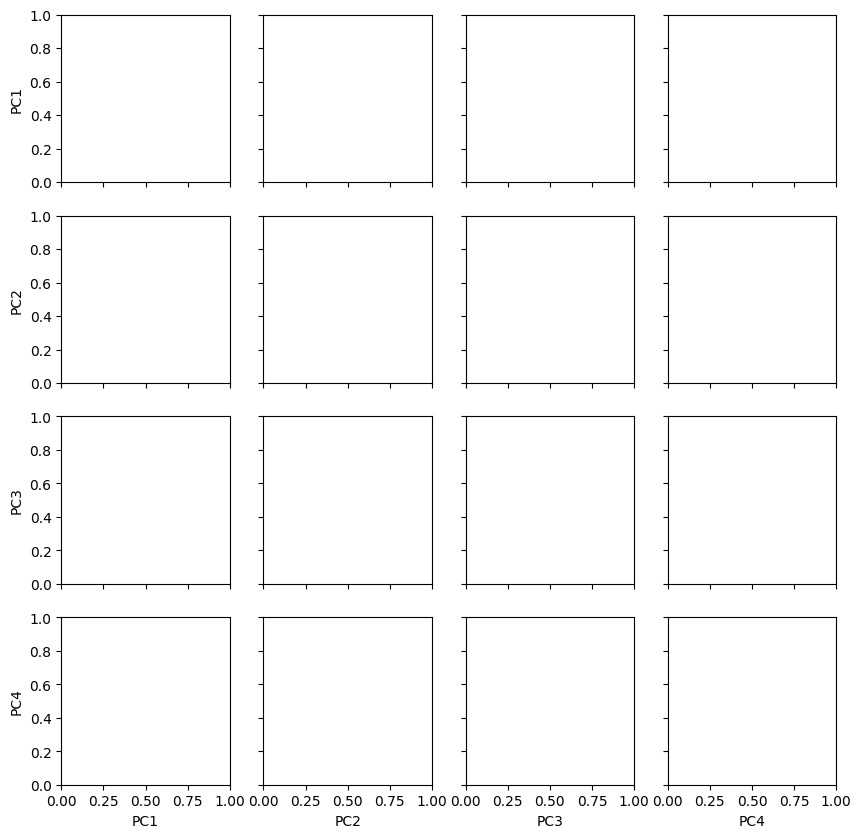

In [189]:
sns.pairplot(data=iris_transform, hue='Species').fig.savefig(r'output/Iris_transform_pairplot.png')

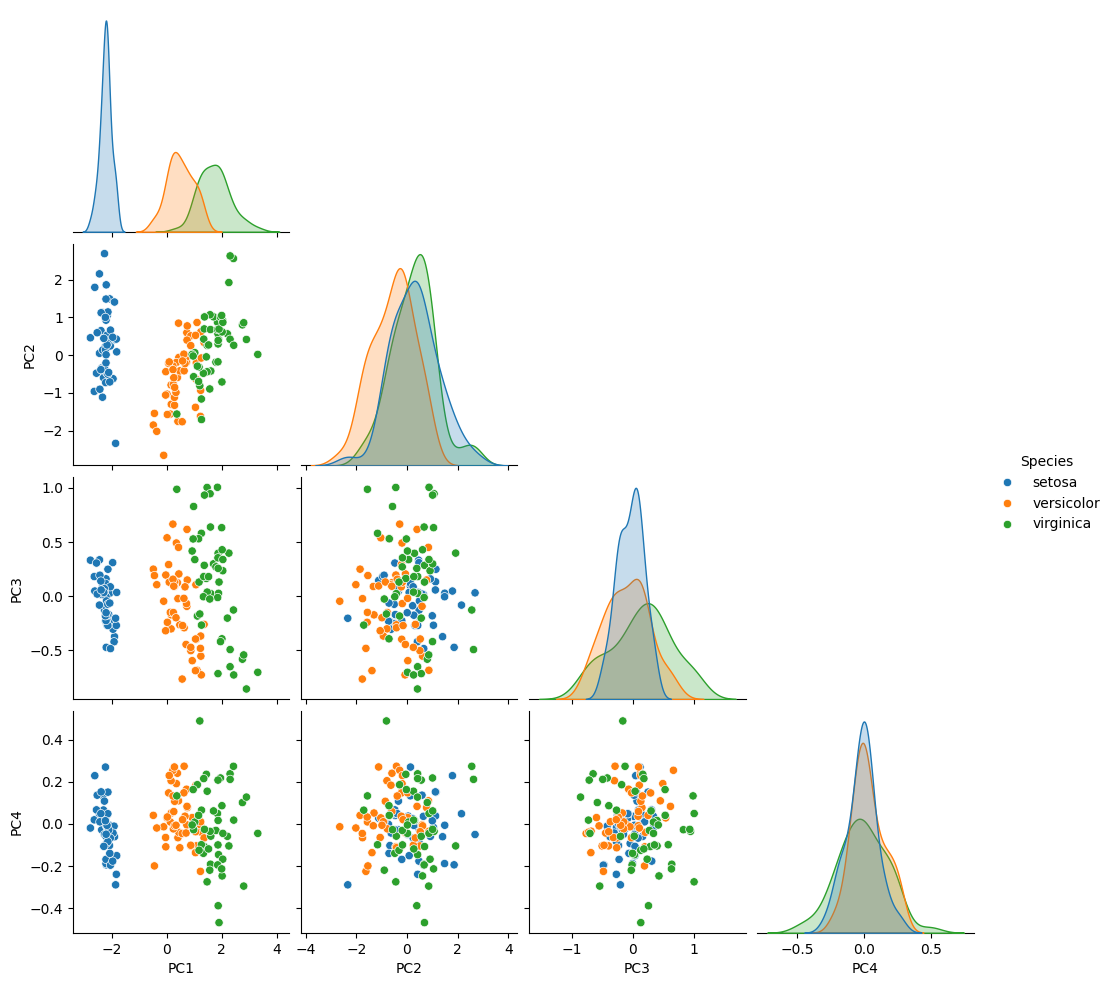

In [ ]:
sns.pairplot(data=iris_transform, hue='Species', corner=True).fig.savefig(r'output/Iris_transform_pairplotCnr.png')

Graph above shows that the best separation is between PC1 and PC2 can remove other components as they
explain very little

#### Lecture 194 Classification with logistic regression:

##### Step 6: Classify Iris with logistic regression model

In [ ]:
iris_train, iris_test = train_test_split(iris_transform, test_size=0.3)

In [ ]:
iris_lr = LogisticRegression().fit(iris_train[['PC1', 'PC2']], y=iris_train.Species)

In [ ]:
iris_lr.coef_

array([[-2.53094094,  0.43064544],
       [-0.00740382, -0.35882265],
       [ 2.53834476, -0.07182279]])

In [ ]:
iris_lr.intercept_

array([-0.38106298,  1.50825512, -1.12719214])

In [ ]:
iris_lr.score(X=iris_test[['PC1', 'PC2']], y=iris_test.Species)
# Tutor's accuracy was only 86% but mine is 91%

0.9333333333333333

#### Optional Step 5 Advanced - Maths behind the PCA Lecture 195
##### Roll our own PCA with numpy

In [ ]:
cov = pca_iris.get_covariance()

In [ ]:
eigen_value, eigen_vector = np.linalg.eig(cov)

In [ ]:
eigen_value

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [ ]:
eigen_vector

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [ ]:
pca_iris.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [ ]:
pca_iris.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

## Lecture 196:  World Happiness Index:

In [ ]:
happiness = pd.read_csv(r'../Resources/Section_31/2019-world-happiness-report.csv')

In [ ]:
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [ ]:
happiness.describe

<bound method NDFrame.describe of      Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986   

#### Step 1: Scaling

In [ ]:
X = happiness.loc[:,'GDP per capita':]

In [ ]:
X

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.340,1.587,0.986,0.596,0.153,0.393
1,1.383,1.573,0.996,0.592,0.252,0.410
2,1.488,1.582,1.028,0.603,0.271,0.341
3,1.380,1.624,1.026,0.591,0.354,0.118
4,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...
151,0.359,0.711,0.614,0.555,0.217,0.411
152,0.476,0.885,0.499,0.417,0.276,0.147
153,0.350,0.517,0.361,0.000,0.158,0.025
154,0.026,0.000,0.105,0.225,0.235,0.035


In [ ]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[ 1.09504166e+00,  1.26809758e+00,  1.08042247e+00,
         1.42428230e+00, -3.35403977e-01,  2.99675712e+00],
       [ 1.20332385e+00,  1.22115409e+00,  1.12185663e+00,
         1.39627687e+00,  7.07264909e-01,  3.17715844e+00],
       [ 1.46773387e+00,  1.25133205e+00,  1.25444597e+00,
         1.47329179e+00,  9.07373079e-01,  2.44494130e+00],
       [ 1.19576928e+00,  1.39216252e+00,  1.24615914e+00,
         1.38927551e+00,  1.78152982e+00,  7.85004247e-02],
       [ 1.23606033e+00,  1.05014566e+00,  1.13428688e+00,
         1.15122941e+00,  1.44450554e+00,  1.98863208e+00],
       [ 1.37707901e+00,  1.06355808e+00,  1.35388797e+00,
         1.25624975e+00,  8.23117007e-01,  2.46616499e+00],
       [ 1.21339662e+00,  9.32786931e-01,  1.17572105e+00,
         1.27025246e+00,  8.65245043e-01,  2.78452027e+00],
       [ 1.00186860e+00,  1.16750438e+00,  1.24615914e+00,
         1.34726738e+00,  1.52876161e+00,  2.85880316e+00],
       [ 1.15799642e+00,  9.93142848e-01,  1.300

In [ ]:
X_scaled.shape

(156, 6)

#### Step 2: PCA


In [ ]:
happiness_pca = PCA().fit(X_scaled)


In [ ]:
happiness_pca.components_

array([[-0.51459462, -0.49064918, -0.51056655, -0.3809577 , -0.05948407,
        -0.29173692],
       [-0.2278181 , -0.22028375, -0.19227192,  0.35212182,  0.69350669,
         0.50760633],
       [-0.02380878,  0.28141961,  0.02808632,  0.11855036,  0.58081716,
        -0.7536873 ],
       [ 0.24040185, -0.0633134 ,  0.27480575, -0.81042518,  0.41891464,
         0.17436089],
       [-0.18376376,  0.77125906, -0.50935561, -0.24006682, -0.00525099,
         0.23299691],
       [ 0.76887077, -0.1808102 , -0.60547761,  0.04905325,  0.0514247 ,
        -0.06701907]])

In [ ]:
happiness_pca.explained_variance_ratio_

array([0.49826532, 0.23760052, 0.10164186, 0.09271212, 0.04355392,
       0.02622626])

In [ ]:
happiness_pca.explained_variance_ratio_.cumsum()

array([0.49826532, 0.73586584, 0.8375077 , 0.93021982, 0.97377374,
       1.        ])

In [ ]:
var_df = pd.DataFrame(
    {
        'Variance Ratio': happiness_pca.explained_variance_ratio_,
        'Cumulative Ratio': happiness_pca.explained_variance_ratio_.cumsum(),
        'Principle Component': range(1, 7)
    }
)

In [ ]:
var_df

,Variance Ratio,Cumulative Ratio,Principle Component
0,0.498265,0.498265,1
1,0.237601,0.735866,2
2,0.101642,0.837508,3
3,0.092712,0.930220,4
4,0.043554,0.973774,5
5,0.026226,1.000000,6


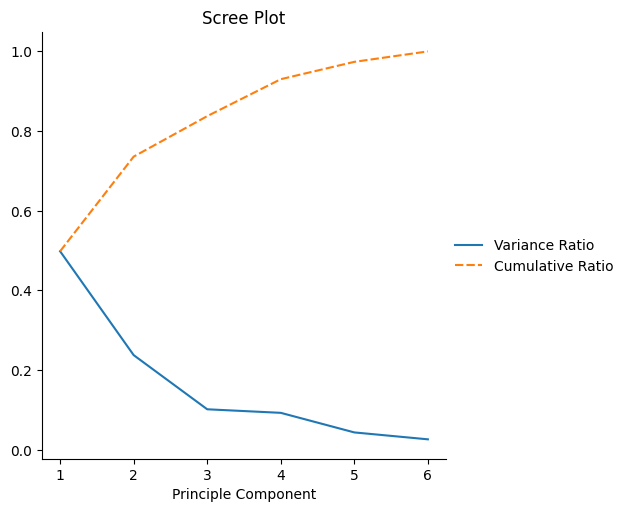

In [ ]:
sns.relplot(data=var_df.set_index('Principle Component'), kind='line').set(title = 'Scree Plot').fig.savefig(r'output/Happiness_relplotLine.png')
# Elbow at 3 so keep 3 components

In [195]:
happiness_df = pd.DataFrame(happiness_pca.transform(X_scaled)[:, 0:3])
happiness_df

,0,1,2
0,-3.134226,1.053542,-1.923436
1,-3.292053,1.836057,-1.471747
2,-3.338247,1.537896,-0.788607
3,-2.592776,0.945854,1.538589
4,-2.835104,1.685571,-0.225374
...,...,...,...
151,0.378692,3.023072,-2.521027
152,1.332517,1.587694,-0.019386
153,3.957017,-0.505351,-0.467332
154,5.089682,1.437319,-0.387760


In [196]:
happiness_df['Country'] = happiness['Country or region']
happiness_df

,0,1,2,Country
0,-3.134226,1.053542,-1.923436,Finland
1,-3.292053,1.836057,-1.471747,Denmark
2,-3.338247,1.537896,-0.788607,Norway
3,-2.592776,0.945854,1.538589,Iceland
4,-2.835104,1.685571,-0.225374,Netherlands
...,...,...,...,...
151,0.378692,3.023072,-2.521027,Rwanda
152,1.332517,1.587694,-0.019386,Tanzania
153,3.957017,-0.505351,-0.467332,Afghanistan
154,5.089682,1.437319,-0.387760,Central African Republic


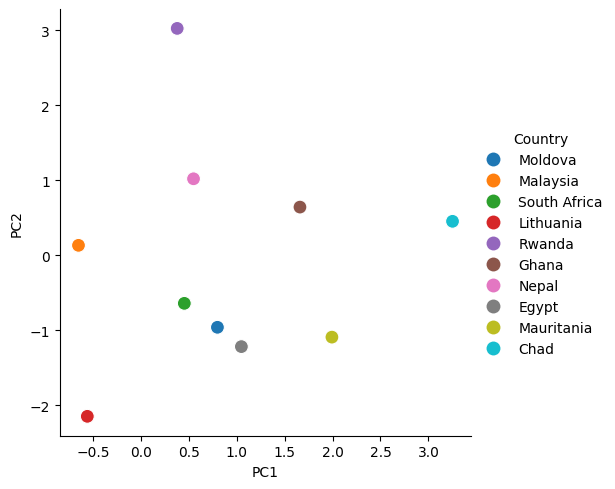

In [203]:
happiness_df.rename(
    {
        0: 'PC1',
        1: 'PC2',
        2: 'PC3'
    },
    axis=1,
    inplace=True
)
data = happiness_df.sample(10)
# happiness_df
sns.relplot(data=data, x=data.PC1, y=data.PC2, hue=data['Country'], s=100).fig.savefig(r'output/relplotHappiness10.png')

In [201]:
happiness_pca.components_

array([[-0.51459462, -0.49064918, -0.51056655, -0.3809577 , -0.05948407,
        -0.29173692],
       [-0.2278181 , -0.22028375, -0.19227192,  0.35212182,  0.69350669,
         0.50760633],
       [-0.02380878,  0.28141961,  0.02808632,  0.11855036,  0.58081716,
        -0.7536873 ],
       [ 0.24040185, -0.0633134 ,  0.27480575, -0.81042518,  0.41891464,
         0.17436089],
       [-0.18376376,  0.77125906, -0.50935561, -0.24006682, -0.00525099,
         0.23299691],
       [ 0.76887077, -0.1808102 , -0.60547761,  0.04905325,  0.0514247 ,
        -0.06701907]])